In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

# Terms to know for Audio in Digital Form:

## Frequency (Hz)
- Frequency describes the differences of wave lengths.
- We interperate frequency has high and low pitches.

<img src="https://uploads-cdn.omnicalculator.com/images/britannica-wave-frequency.jpg" width="400"/>

## Intensity (db / power)
- Intensity describes the amplitude (height) of the wave.

<img src="https://ars.els-cdn.com/content/image/3-s2.0-B9780124722804500162-f13-15-9780124722804.gif" width="400"/>

## Sample Rate
- Sample rate is specific to how the computer reads in the audio file.
- Think of it as the "resolution" of the audio.

<img src="https://www.headphonesty.com/wp-content/uploads/2019/07/Sample-Rate-Bit-Depth-and-Bit-Rate.jpeg" width="400"/>


In [32]:
audio_files = glob('audio data/*/*.wav') #getting all the audio files

In [33]:
ipd.Audio(audio_files[0]) #to play the audio file inside the notebook

In [34]:
y, sr = librosa.load(audio_files[0], sr=None) #loading the audio file -> y is the audio time series, sr is the sampling rate

In [35]:
print(y)
print(y.shape, sr)

[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 9.1552734e-05 3.0517578e-05
 0.0000000e+00]
(114688,) 48000


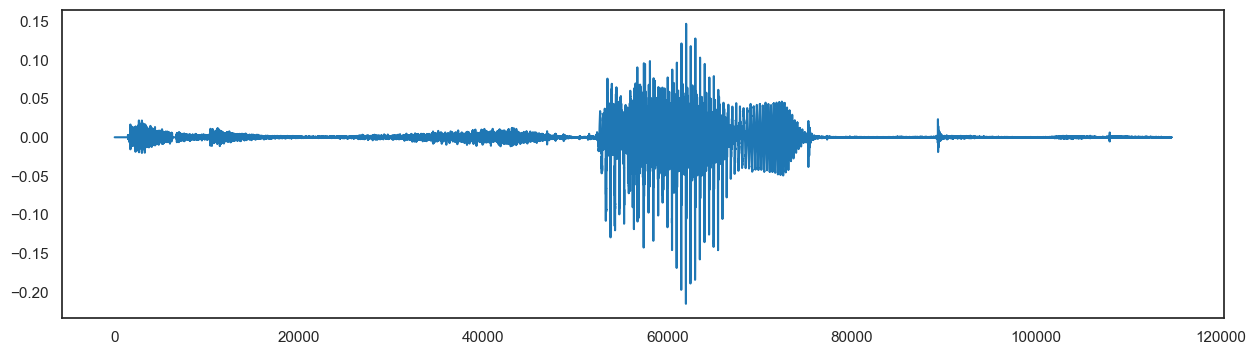

In [36]:
pd.Series(y).plot(figsize=(15, 4), color=next(color_cycle)) #plotting the audio time series
plt.show()

In [37]:
y_trimmed, index = librosa.effects.trim(y, top_db=15) #trimming the audio file -> #note I get an error on Windows when this file is run in a folder that has a long path -> solution is to move it to the desktop or a folder with a shorter path
#setting top_db to 15 means that the function will remove all the parts of the audio that are below 15 decibels -> remove the early noises

In [38]:
print(y_trimmed)
print(y_trimmed.shape, index)

[ 0.0000000e+00 -9.1552734e-05  2.4414062e-04 ... -6.5002441e-03
 -6.9580078e-03 -7.0495605e-03]
(22528,) [52224 74752]


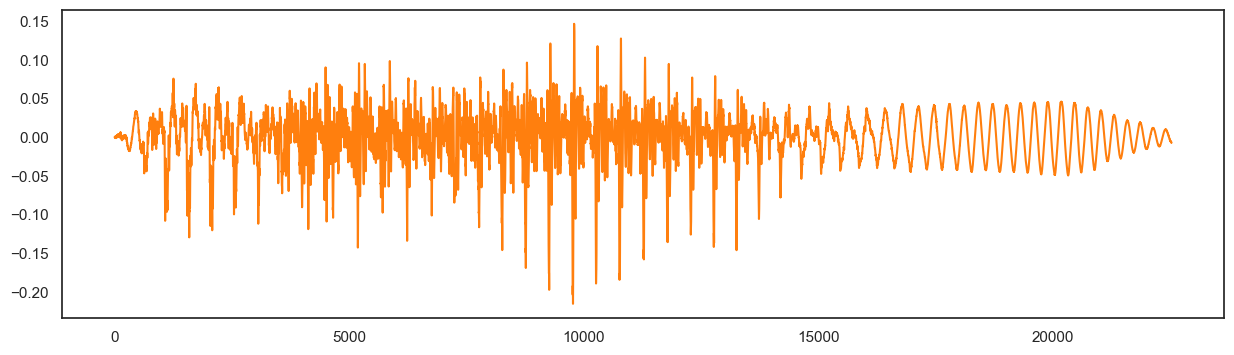

In [39]:
pd.Series(y_trimmed).plot(figsize=(15, 4), color=next(color_cycle)) #plotting the audio time series
plt.show()

In [40]:
#trimmed audio
ipd.Audio(y_trimmed, rate=sr)

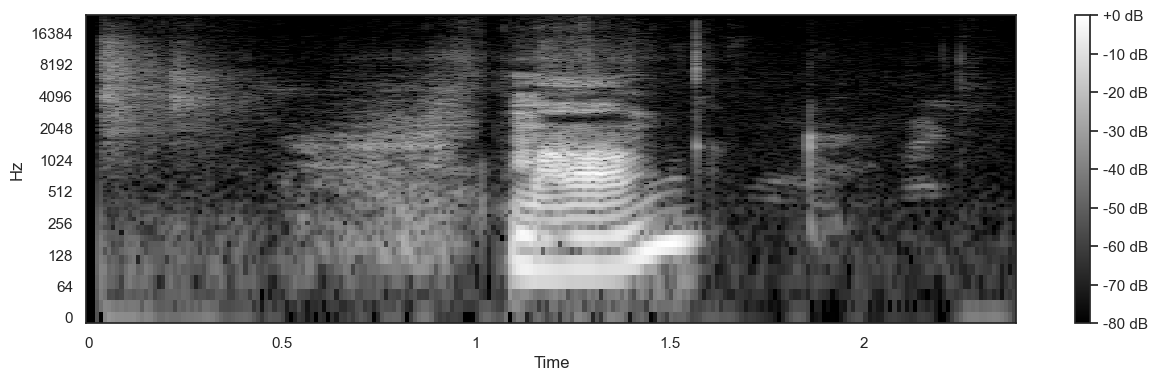

In [43]:
#Making the spectrogram
D = librosa.stft(y) #short-time Fourier transform -> using y because we want to base our output indices on the original audio file
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max) #converting the amplitude to decibels

plt.figure(figsize=(15, 4))
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log')
plt.set_cmap('gray') #making it greyscale
plt.colorbar(format='%+2.0f dB') #add a color bar to the spectrogram
